In [1]:
import matplotlib.pyplot as plt

In [5]:
def rows(file):
    csv = open(f"../{file}.csv", "r").read()
    rows = [row.split("\t") for row in csv.split("\n")]
    
    sizes = [1000 * float(row[1]) * 2 * float(row[1]) for row in rows]
    times = [float(row[2]) for row in rows]
    memes = [float(row[3]) for row in rows]
    return (rows, sizes, times, memes)

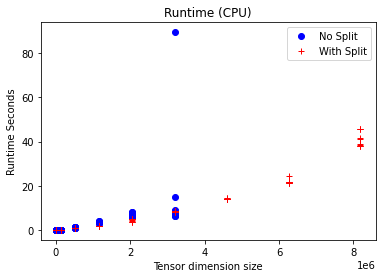

In [11]:
# plot times
_, s_ns, t_ns, _ = rows("bench_no_split")
_, s_ws, t_ws, _ = rows("bench_with_split")
plt.plot(s_ns, t_ns, "ob", label="No Split")
plt.plot(s_ws, t_ws, "+r", label="With Split")
plt.title("Runtime (CPU)")
plt.ylabel("Runtime Seconds")
plt.xlabel("Tensor dimension size")
plt.legend()
plt.savefig("cpu_runtime.png", dpi=300)
plt.show()

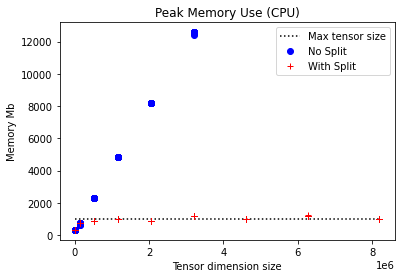

In [12]:
# plot memory
_, s_ns, _, m_ns = rows("bench_no_split")
_, s_ws, _, m_ws = rows("bench_with_split")
plt.plot(s_ws, [1000.0 for _ in s_ws], ":k", label="Max tensor size")
plt.plot(s_ns, m_ns, "ob", label="No Split")
plt.plot(s_ws, m_ws, "+r", label="With Split")
plt.title("Peak Memory Use (CPU)")
plt.ylabel("Memory Mb")
plt.xlabel("Tensor dimension size")
plt.legend()
plt.savefig("cpu_memory.png", dpi=300)
plt.show()